## Endometryosis Detection

In [7]:
import matplotlib.pyplot as plt
from google.colab import files
import os, shutil
from sklearn.model_selection import train_test_split

In [2]:
!wget -O annotated_classes.zip https://ftp.itec.aau.at/datasets/GLENDA/downloads//Glenda_v1.5_classes.zip
!wget -O no_pathology.zip https://ftp.itec.aau.at/datasets/GLENDA/downloads/GLENDA_v1.5_no_pathology.zip

--2025-06-16 12:17:39--  https://ftp.itec.aau.at/datasets/GLENDA/downloads//Glenda_v1.5_classes.zip
Resolving ftp.itec.aau.at (ftp.itec.aau.at)... 143.205.173.53
Connecting to ftp.itec.aau.at (ftp.itec.aau.at)|143.205.173.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28009709 (27M) [application/zip]
Saving to: ‘annotated_classes.zip’

annotated_classes.z 100%[===================>]  26.71M  6.81MB/s    in 4.3s    

2025-06-16 12:17:46 (6.26 MB/s) - ‘annotated_classes.zip’ saved [28009709/28009709]

--2025-06-16 12:17:46--  https://ftp.itec.aau.at/datasets/GLENDA/downloads/GLENDA_v1.5_no_pathology.zip
Resolving ftp.itec.aau.at (ftp.itec.aau.at)... 143.205.173.53
Connecting to ftp.itec.aau.at (ftp.itec.aau.at)|143.205.173.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867544435 (827M) [application/zip]
Saving to: ‘no_pathology.zip’

no_pathology.zip    100%[===================>] 827.35M  8.22MB/s    in 78s     

2025-06-16 12:19

In [3]:
!unzip annotated_classes.zip
!unzip no_pathology.zip

Streaming output truncated to the last 5000 lines.
  inflating: no_pathology/frames/v_4044_s_0-253/f_27.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_28.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_29.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_3.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_30.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_31.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_32.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_33.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_34.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_35.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_36.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_37.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_38.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_39.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_4.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_40.jpg  
  infla

## Classification

In [8]:
# 2) Re-organize into train/validation folders for ImageDataGenerator

# original paths
pos_dir = 'Glenda_v1.5_classes/frames'
neg_dir = 'no_pathology/frames'

# new base
base_dir = 'data'
for split in ['train','validation']:
    for cls in ['positive','negative']:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# collect all filepaths
pos_files = [os.path.join(dp, f) for dp,_,fs in os.walk(pos_dir) for f in fs if f.lower().endswith(('.jpg','.png'))]
neg_files = [os.path.join(dp, f) for dp,_,fs in os.walk(neg_dir) for f in fs if f.lower().endswith(('.jpg','.png'))]

# train/val split
pos_tr, pos_val = train_test_split(pos_files, test_size=0.2, random_state=42)
neg_tr, neg_val = train_test_split(neg_files, test_size=0.2, random_state=42)

# copy
for src_list, split, label in [
    (pos_tr, 'train','positive'),
    (pos_val,'validation','positive'),
    (neg_tr, 'train','negative'),
    (neg_val,'validation','negative'),
]:
    for src in src_list:
        dst = os.path.join(base_dir, split, label, os.path.basename(src))
        shutil.copy2(src, dst)

In [9]:
# 3) Classification pipeline with transfer learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Found 3560 images belonging to 2 classes.
Found 1855 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.8967 - loss: 0.3559

112/112 ━━━━━━━━━━━━━━━━━━━━ 105s 759ms/step - accuracy: 0.8968 - loss: 0.3556 - val_accuracy: 0.9596 - val_loss: 0.1721
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 583ms/step - accuracy: 0.9178 - loss: 0.2984 - val_accuracy: 0.9596 - val_loss: 0.1827
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 580ms/step - accuracy: 0.9209 - loss: 0.2873 - val_accuracy: 0.9596 - val_loss: 0.1879
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 66s 588ms/step - accuracy: 0.9154 - loss: 0.2978 - val_accuracy: 0.9596 - val_loss: 0.1798
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 580ms/step - accuracy: 0.9210 - loss: 0.2845 - val_accuracy: 0.9596 - val_loss: 0.1880
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 583ms/step - accuracy: 0.9114 - loss: 0.3057 - val_accuracy: 0.9596 - val_loss: 0.1843


In [ ]:
img_size = (224,224)
batch_size = 32

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.0  # we'll use separate dirs
)
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir,'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir,'validation'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

In [ ]:
# build model
base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*img_size,3))
base.trainable = False
clf = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# callbacks
callbacks = [
    ModelCheckpoint('best_classifier.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
]

In [ ]:
# train
clf_history = clf.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

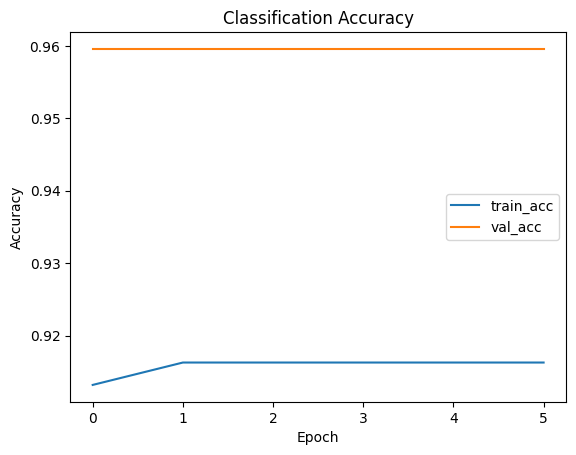

In [10]:
plt.figure()
plt.plot(clf_history.history['accuracy'], label='train_acc')
plt.plot(clf_history.history['val_accuracy'], label='val_acc')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

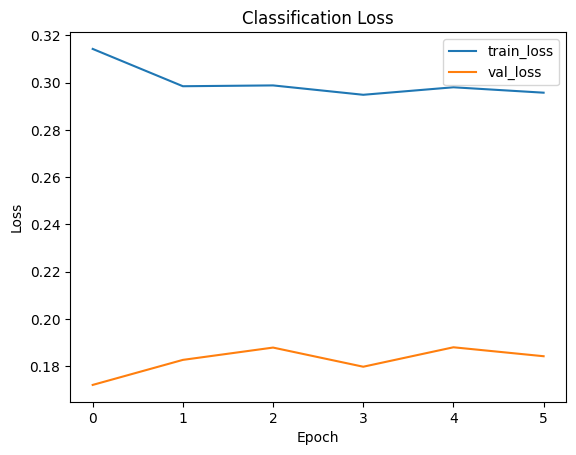

In [11]:
plt.figure()
plt.plot(clf_history.history['loss'], label='train_loss')
plt.plot(clf_history.history['val_loss'], label='val_loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Segmentation

In [12]:
# 4) U-Net segmentation pipeline
import glob
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

# paths
img_paths  = sorted(glob.glob('Glenda_v1.5_classes/frames/**/*.jpg',  recursive=True))
mask_paths = sorted(glob.glob('Glenda_v1.5_classes/annots/**/*.png',  recursive=True))

# split
imgs_tr, imgs_val, msks_tr, msks_val = train_test_split(
    img_paths, mask_paths, test_size=0.2, random_state=42)

In [13]:
# helper funcs
def preprocess(img_path, mask_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size) / 255.0
    m   = tf.io.read_file(mask_path)
    m   = tf.image.decode_png(m, channels=1)
    m   = tf.image.resize(m, img_size) / 255.0
    return img, m

train_ds = tf.data.Dataset.from_tensor_slices((imgs_tr, msks_tr)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(16).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((imgs_val, msks_val)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(16).prefetch(tf.data.AUTOTUNE)

In [14]:
# dice loss
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(y_true,[-1])
    y_pred_f = tf.reshape(y_pred,[-1])
    inter  = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.*inter + smooth) / (tf.reduce_sum(y_true_f)+tf.reduce_sum(y_pred_f)+smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [15]:
# U-Net model
inputs = Input((*img_size,3))
c1 = Conv2D(64,3,activation='relu',padding='same')(inputs)
p1 = MaxPooling2D()(c1)

c2 = Conv2D(128,3,activation='relu',padding='same')(p1)
p2 = MaxPooling2D()(c2)

c3 = Conv2D(256,3,activation='relu',padding='same')(p2)

u2 = Conv2DTranspose(128,3,strides=2,padding='same')(c3)
u2 = concatenate([u2,c2])
c4 = Conv2D(128,3,activation='relu',padding='same')(u2)

u1 = Conv2DTranspose(64,3,strides=2,padding='same')(c4)
u1 = concatenate([u1,c1])
c5 = Conv2D(64,3,activation='relu',padding='same')(u1)

outputs = Conv2D(1,1,activation='sigmoid')(c5)
unet = Model(inputs, outputs)

unet.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coef])

# segmentation callbacks & train
seg_callbacks = [
    ModelCheckpoint('best_unet.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
]


In [16]:
seg_history = unet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=seg_callbacks
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - dice_coef: 0.0713 - loss: 0.9287

19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step - dice_coef: 0.0712 - loss: 0.9288 - val_dice_coef: 0.0706 - val_loss: 0.9297
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - dice_coef: 0.0752 - loss: 0.9247

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - dice_coef: 0.0751 - loss: 0.9248 - val_dice_coef: 0.0969 - val_loss: 0.9030
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - dice_coef: 0.0182 - loss: 0.9818 - val_dice_coef: 3.9953e-05 - val_loss: 1.0000
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - dice_coef: 3.6191e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000


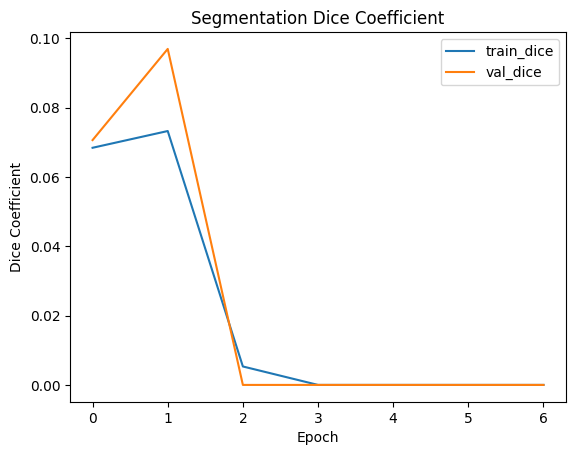

In [17]:
plt.figure()
plt.plot(seg_history.history['dice_coef'], label='train_dice')
plt.plot(seg_history.history['val_dice_coef'], label='val_dice')
plt.title('Segmentation Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

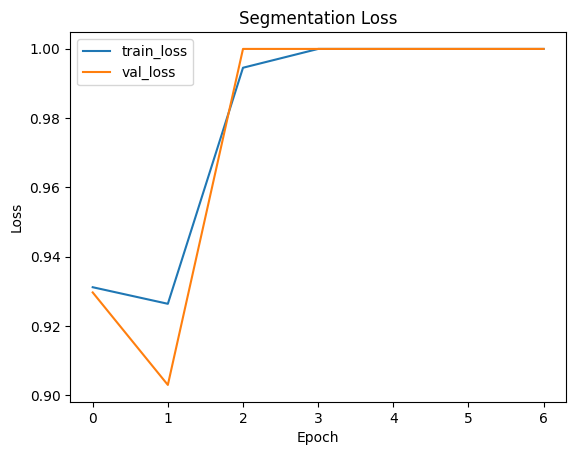

In [18]:
plt.figure()
plt.plot(seg_history.history['loss'], label='train_loss')
plt.plot(seg_history.history['val_loss'], label='val_loss')
plt.title('Segmentation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


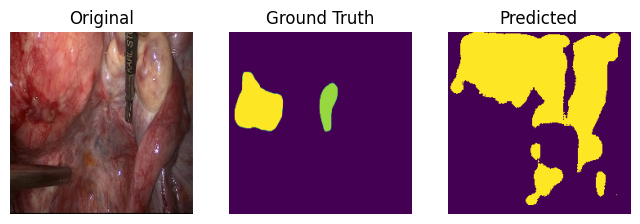

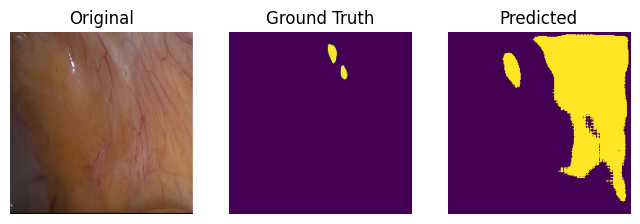

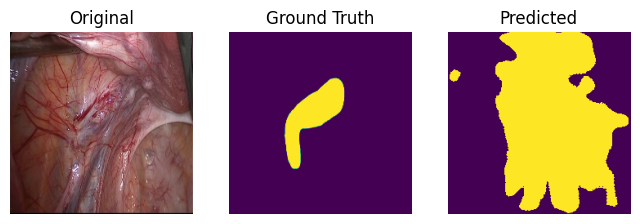

In [19]:
# --- Sample segmentation results ---
num_samples = 3
for images, masks in val_ds.take(1):
    preds = unet.predict(images)
    for i in range(num_samples):
        plt.figure(figsize=(8,4))
        # Original image
        plt.subplot(1,3,1)
        plt.imshow(images[i])
        plt.title('Original')
        plt.axis('off')
        # Ground truth mask
        plt.subplot(1,3,2)
        plt.imshow(masks[i].numpy().squeeze())
        plt.title('Ground Truth')
        plt.axis('off')
        # Predicted mask
        plt.subplot(1,3,3)
        plt.imshow(preds[i].squeeze() > 0.5)
        plt.title('Predicted')
        plt.axis('off')
        plt.show()